In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

### PART 1

### Loading and preparing data:

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1)) / 255.0
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1)) / 255.0

### Construction of a convolutional neural network:

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model compilation and training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 14s 12ms/step - loss: 0.5991 - accuracy: 0.7813 - val_loss: 0.3954 - val_accuracy: 0.8584
Epoch 2/30
750/750 [==============================] - 5s 7ms/step - loss: 0.3610 - accuracy: 0.8695 - val_loss: 0.3454 - val_accuracy: 0.8787
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3079 - accuracy: 0.8894 - val_loss: 0.3130 - val_accuracy: 0.8849
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.2779 - accuracy: 0.8987 - val_loss: 0.2888 - val_accuracy: 0.8964
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.2561 - accuracy: 0.9053 - val_loss: 0.2801 - val_accuracy: 0.8967
Epoch 6/30
750/750 [==============================] - 4s 5ms/step - loss: 0.2347 - accuracy: 0.9133 - val_loss: 0.2782 - val_accuracy: 0.9028
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.2172 - accuracy: 0.9203 - val_loss: 0.2573 - val_accuracy: 0.9060
Epoc

In [4]:
print(f"Achieved accuracy on training {history.history['accuracy'][-1]} and test data {history.history['val_accuracy'][-1]} of our model")

Achieved accuracy on training 0.9826874732971191 and test data 0.906583309173584 of our model


In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

### Let's plot accuracy and loss graphs on the training and test sets:

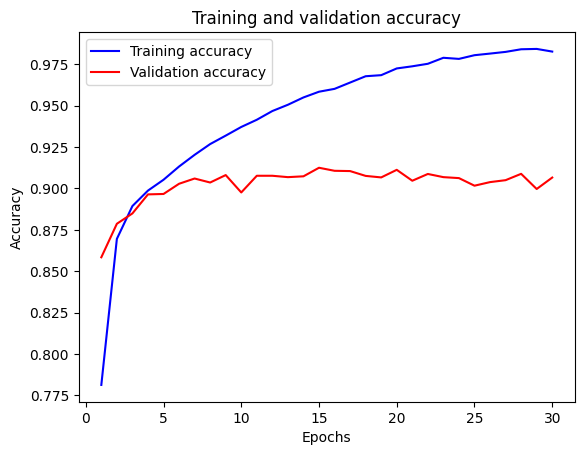

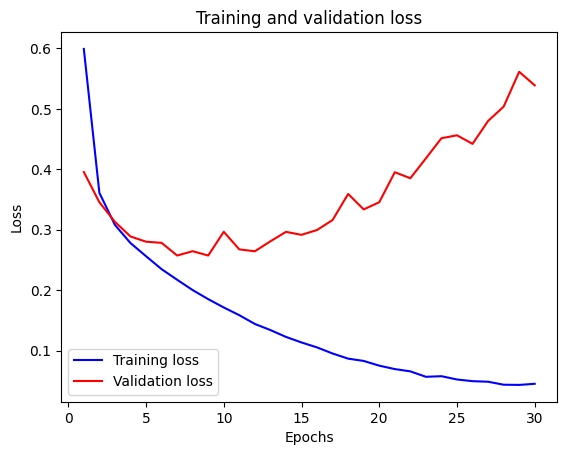

In [6]:
import matplotlib.pyplot as plt

# Get a history of accuracy and loss during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy graph
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plotting the loss graph
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Let's increase the number of epochs and decrease the number of batch sizes:

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model compilation and training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5331 - accuracy: 0.8063 - val_loss: 0.4002 - val_accuracy: 0.8550
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3417 - accuracy: 0.8761 - val_loss: 0.3145 - val_accuracy: 0.8869
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2955 - accuracy: 0.8930 - val_loss: 0.3020 - val_accuracy: 0.8884
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2626 - accuracy: 0.9042 - val_loss: 0.2723 - val_accuracy: 0.8982
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2368 - accuracy: 0.9120 - val_loss: 0.2704 - val_accuracy: 0.9016
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2161 - accuracy: 0.9208 - val_loss: 0.2704 - val_accuracy: 0.9041
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1974 - accuracy: 0.9277 - val_loss: 0.2791 - val_accuracy

In [8]:
print(f"Achieved accuracy on training {history.history['accuracy'][-1]} and test data {history.history['val_accuracy'][-1]} of our model")

Achieved accuracy on training 0.9833124876022339 and test data 0.9007499814033508 of our model


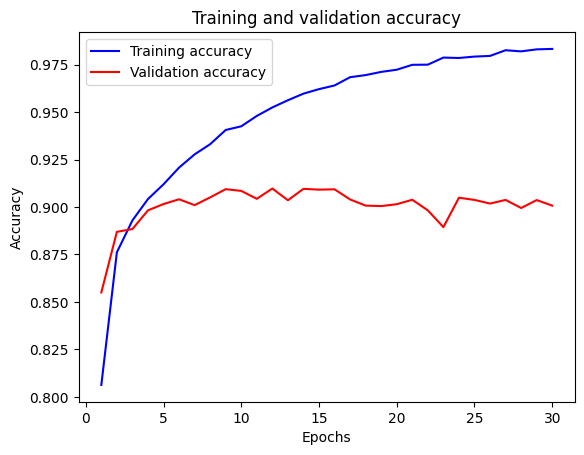

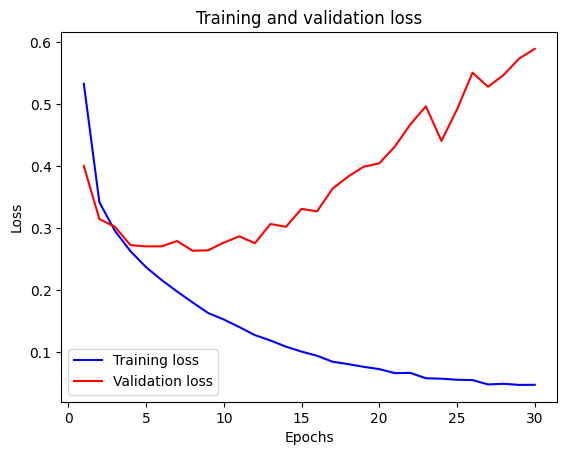

In [9]:
# Get a history of accuracy and loss during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy graph
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plotting the loss graph
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It can be seen that the accuracy on the training data increases rapidly, much faster than that of the fully connected neural network. But on the test data, the results are much worse, the error increases significantly after the 10th epoch, which indicates the phenomenon of overtraining.

---

As a result of the research, we found that the accuracy of the convolutional neural network is higher compared to the fully connected one (from the previous homework), namely 98% versus 91.5%. It also became clear that training a convolutional neural network takes more time.

### PART 2

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Loading and preparing data:

In [11]:
# Loading and preparing data
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
# Resize images to 32x32 and add a third color channel
train_x = np.expand_dims(train_x, axis=-1)
train_x = np.repeat(train_x, 3, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
test_x = np.repeat(test_x, 3, axis=-1)
train_x = tf.image.resize(train_x, [32, 32])
test_x = tf.image.resize(test_x, [32, 32])
train_x = train_x / 255.0
test_x = test_x / 255.0

# Coding of categorical labels
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [12]:
# Loading convolutional framework VGG16
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freezing of the convolutional base
vgg16_base.trainable = False

# Adding fully connected layers for classification
x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=output)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(test_x, test_y)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1500/1500 [==============================] - 17s 10ms/step - loss: 0.5235 - accuracy: 0.8113 - val_loss: 0.4422 - val_accuracy: 0.8371
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4014 - accuracy: 0.8521 - val_loss: 0.3996 - val_accuracy: 0.8528
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3653 - accuracy: 0.8641 - val_loss: 0.3840 - val_accuracy: 0.8584
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3393 - accuracy: 0.8732 - val_loss: 0.3817 - val_accuracy: 0.8651
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3222 - accuracy: 0.8789 - val_loss: 0.3846 - val_accuracy: 0.8585
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3042 - accuracy: 0.8844 - val_loss: 0.3988 - val_accuracy: 0.8580
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2911 - accuracy: 0.8913 - val_loss: 0.3707 -

It is important to say that training the convolutional base VGG16 takes much more time, in our case - 2 hours and 20 minutes.
As a result, we obtained accuracy on the training data 90%, and on the test data - 87%.
Having conducted parallel training with an increased batch size (512), we obtained slightly worse results in terms of accuracy (less by 1-2%) and did not achieve acceleration of the training process.
We conducted all these trainings at the CPU.

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

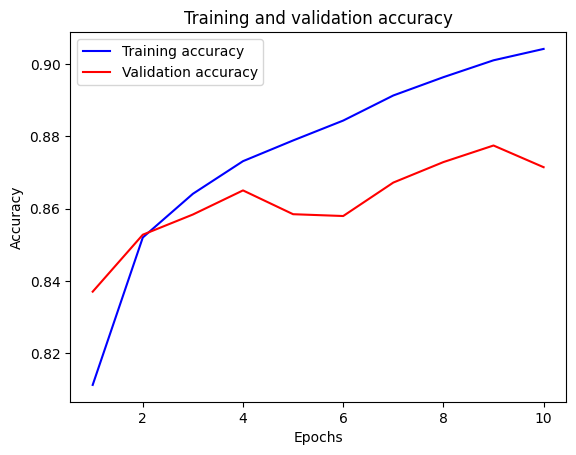

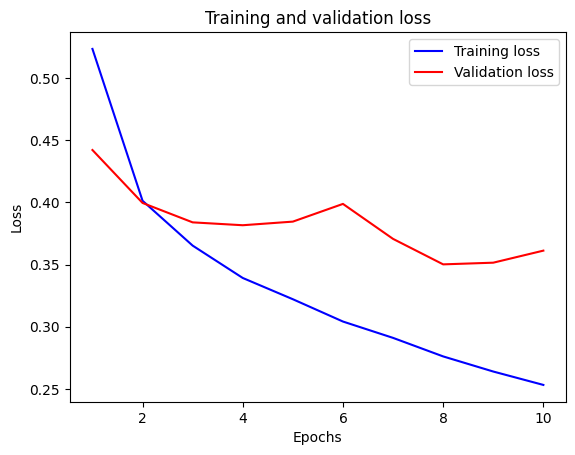

In [13]:
import matplotlib.pyplot as plt

# Get a history of accuracy and loss during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy graph
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plotting the loss graph
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Using the GPU, you don't need to wait for hours of training, the process of learning the model is much faster.

In [14]:
# Loading convolutional framework VGG16
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freezing of the convolutional base
vgg16_base.trainable = False

# Adding fully connected layers for classification
x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=output)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(test_x, test_y)
print("Test Accuracy:", test_accuracy)

Epoch 1/30
375/375 [==============================] - 11s 23ms/step - loss: 0.5805 - accuracy: 0.7966 - val_loss: 0.4755 - val_accuracy: 0.8262
Epoch 2/30
375/375 [==============================] - 8s 22ms/step - loss: 0.4200 - accuracy: 0.8471 - val_loss: 0.4205 - val_accuracy: 0.8477
Epoch 3/30
375/375 [==============================] - 9s 23ms/step - loss: 0.3826 - accuracy: 0.8595 - val_loss: 0.3965 - val_accuracy: 0.8561
Epoch 4/30
375/375 [==============================] - 7s 20ms/step - loss: 0.3616 - accuracy: 0.8661 - val_loss: 0.3874 - val_accuracy: 0.8571
Epoch 5/30
375/375 [==============================] - 9s 23ms/step - loss: 0.3406 - accuracy: 0.8739 - val_loss: 0.3768 - val_accuracy: 0.8634
Epoch 6/30
375/375 [==============================] - 7s 19ms/step - loss: 0.3249 - accuracy: 0.8798 - val_loss: 0.3652 - val_accuracy: 0.8665
Epoch 7/30
375/375 [==============================] - 7s 19ms/step - loss: 0.3103 - accuracy: 0.8848 - val_loss: 0.3662 - val_accuracy: 0.866

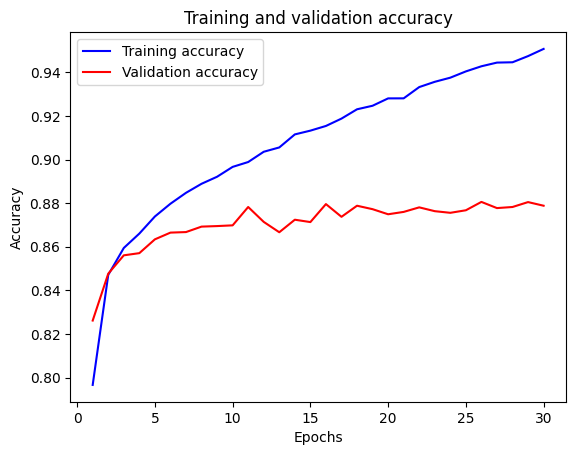

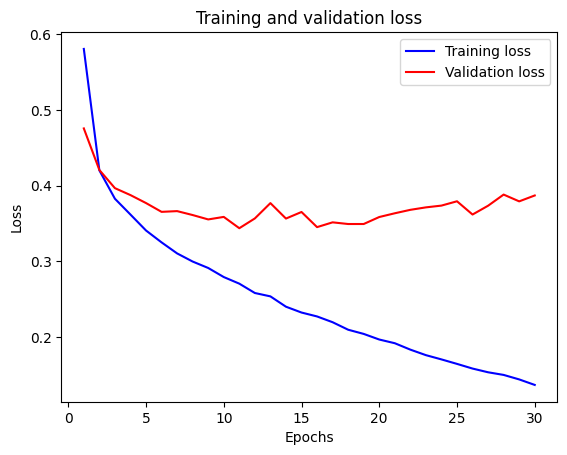

In [15]:
import matplotlib.pyplot as plt

# Get a history of accuracy and loss during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy graph
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plotting the loss graph
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As a result of these trainings with the convolutional basis VGG16, we have achieved lower accuracy compared to the conventional convolutional network, and we also observe the retraining process starting from epoch 10.